#Introduction

# **Understanding Risk Score Drivers Using Feature Correlations and Predictive Modeling**

## Team Members:
- Gavin Robertson
- Aaron Ravela
- Nick Wilson

Instructor: Dr. Saquer

Date: December 10, 2025

College: Missouri State University

# Imports(start here)

In [ ]:
!pip install catboost

In [361]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import seaborn as sns

In [85]:
#Found on Kaggle
#https://www.kaggle.com/datasets/mohankrishnathalla/medical-insurance-cost-prediction

raw = pd.read_csv('https://raw.githubusercontent.com/Abled773/HI-Risk-Prediction-and-Analysis/main/medical_insurance.csv')

# Understanding the Data

In [225]:
# 54 Columns
raw.columns

Index(['person_id', 'age', 'sex', 'region', 'urban_rural', 'income',
       'education', 'marital_status', 'employment_status', 'household_size',
       'dependents', 'bmi', 'smoker', 'alcohol_freq', 'visits_last_year',
       'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs',
       'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c',
       'plan_type', 'network_tier', 'deductible', 'copay', 'policy_term_years',
       'policy_changes_last_2yrs', 'provider_quality', 'risk_score',
       'annual_medical_cost', 'annual_premium', 'monthly_premium',
       'claims_count', 'avg_claim_amount', 'total_claims_paid',
       'chronic_count', 'hypertension', 'diabetes', 'asthma', 'copd',
       'cardiovascular_disease', 'cancer_history', 'kidney_disease',
       'liver_disease', 'arthritis', 'mental_health', 'proc_imaging_count',
       'proc_surgery_count', 'proc_physio_count', 'proc_consult_count',
       'proc_lab_count', 'is_high_risk', 'had_major_procedure'],
      

In [226]:
raw.shape

(100000, 54)

In [227]:
raw.head()

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0


In [228]:
# Data dTypes are well defined and only have 10 object Dtypes
# Some of the objects can be converted to categorical later on for consistency

raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   person_id                    100000 non-null  int64  
 1   age                          100000 non-null  int64  
 2   sex                          100000 non-null  object 
 3   region                       100000 non-null  object 
 4   urban_rural                  100000 non-null  object 
 5   income                       100000 non-null  float64
 6   education                    100000 non-null  object 
 7   marital_status               100000 non-null  object 
 8   employment_status            100000 non-null  object 
 9   household_size               100000 non-null  int64  
 10  dependents                   100000 non-null  int64  
 11  bmi                          100000 non-null  float64
 12  smoker                       100000 non-null  object 
 13  

In [229]:
raw.describe(include="all")

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
count,100000.000000,100000.000000,100000,100000,100000,1.000000e+05,100000,100000,100000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
unique,NaN,NaN,3,5,3,NaN,6,4,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Female,South,Urban,NaN,Bachelors,Married,Employed,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,49193,28029,60019,NaN,27996,53252,55269,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,50000.500000,47.521500,NaN,NaN,NaN,4.987390e+04,NaN,NaN,NaN,2.430900,...,0.014770,0.108310,0.130140,0.508530,0.158690,0.508390,0.50933,0.509140,0.367810,0.169700
std,28867.657797,15.988752,NaN,NaN,NaN,4.680021e+04,NaN,NaN,NaN,1.075126,...,0.120632,0.310773,0.336459,0.749755,0.463562,0.747218,0.75363,0.750455,0.482212,0.375371
min,1.000000,0.000000,NaN,NaN,NaN,1.100000e+03,NaN,NaN,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,25000.750000,37.000000,NaN,NaN,NaN,2.110000e+04,NaN,NaN,NaN,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,50000.500000,48.000000,NaN,NaN,NaN,3.620000e+04,NaN,NaN,NaN,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,75000.250000,58.000000,NaN,NaN,NaN,6.220000e+04,NaN,NaN,NaN,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000


In [230]:
# This is a strong dataset with no null values in all of the columns besides alcohol_freq
raw.isna().sum()


,0
person_id,0
age,0
sex,0
region,0
urban_rural,0
income,0
education,0
marital_status,0
employment_status,0
household_size,0


In [231]:
# No Duplicate Rows
raw.duplicated().sum()

np.int64(0)

## Summary of Structure Analysis
From the Structure analysis, we can see the data:

 * Has a size of 5400000(100000 x 54)
 * Has well defined data types (13 floats, 31 ints, 10 objects)
 * All columns do not have null values and exist in all rows except for alchohol frequency
 * No duplicate rows








---



# Data Cleaning

Because this data is so well-defined, it needs very little cleaning in order to be operational. Still there are some tasks that we can do:

 * Manage missing alchohol frequency data
 * Create a table suitable for reading
 * Create a table suitable for analysis

## Changing Object Data Types

In [284]:
# show all object dType columns and put them in a list
obj_cols = list(raw.select_dtypes(include='object').columns)
obj_cols

['sex',
 'region',
 'urban_rural',
 'education',
 'marital_status',
 'employment_status',
 'smoker',
 'alcohol_freq',
 'plan_type',
 'network_tier']

In [285]:
#see the range of data of object data types
for col in obj_cols:
    print(f"Unique values for column '{col}': {raw[col].unique()}")

Unique values for column 'sex': ['Female' 'Male' 'Other']
Unique values for column 'region': ['North' 'Central' 'West' 'South' 'East']
Unique values for column 'urban_rural': ['Suburban' 'Urban' 'Rural']
Unique values for column 'education': ['Doctorate' 'No HS' 'HS' 'Some College' 'Masters' 'Bachelors']
Unique values for column 'marital_status': ['Married' 'Single' 'Divorced' 'Widowed']
Unique values for column 'employment_status': ['Retired' 'Employed' 'Self-employed' 'Unemployed']
Unique values for column 'smoker': ['Never' 'Current' 'Former']
Unique values for column 'alcohol_freq': [nan 'Weekly' 'Daily' 'Occasional']
Unique values for column 'plan_type': ['PPO' 'POS' 'HMO' 'EPO']
Unique values for column 'network_tier': ['Bronze' 'Gold' 'Platinum' 'Silver']


### Manage Missing Alcohol Frequency Data

Before we can deal with Alchohol frequency as a data type, we must manage the null values in this column. So let us look at the reasoning for these null values.

**Important** When testing, we noticed that on some devices the None values transfer properly as "None" others the None values transfer as Null. If you see that there are null values, do not worry, everything should still work!

In [286]:
raw["alcohol_freq"].head(10)

,alcohol_freq
0,NaN
1,Weekly
2,NaN
3,NaN
4,Daily
5,Daily
6,Occasional
7,Weekly
8,NaN
9,Weekly


We can see that in the first 10 rows. There is no row that has a defined none category. Due to this, we can assume that null values mean that the patient does not consume alcohol.

For now we will leave it be and handle it when converting all object data types.

Now that we understand the object data, it's time to convert the data for correlation and regression analysis. Note that some columns will be modified once we get to modeling risk_score. This is because some of the columns that have no numerical data and no rankings cannot be correlated properly without one-hotting everything.

## Creating an Optimized Readable Data Table

In [287]:
# Copied raw table so we can create a clean table without affecting the original
data = raw.copy()

# Creating a clean READABLE table

# handle na alcohol values
data["alcohol_freq"] = data["alcohol_freq"].fillna("None")

# convert to category data types
data[obj_cols] = data[obj_cols].astype('category')

data['alcohol_freq'].value_counts()
data[obj_cols].info(0)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   sex                100000 non-null  category
 1   region             100000 non-null  category
 2   urban_rural        100000 non-null  category
 3   education          100000 non-null  category
 4   marital_status     100000 non-null  category
 5   employment_status  100000 non-null  category
 6   smoker             100000 non-null  category
 7   alcohol_freq       100000 non-null  category
 8   plan_type          100000 non-null  category
 9   network_tier       100000 non-null  category
dtypes: category(10)
memory usage: 978.5 KB


## Creating a Analysis-Ready Table

In order for the categorical data to be readable by the correlation methods and regression models, they must be reperesented in a numerical format, whether that be by bools, ints or floats. We will go in further detail on our encoding methods after in the conclusion.

For the categorical data that does not have an order, we use one-hot encoding.

In [288]:
# one-hot all nominal values

# Create a copy of clean data, so we can create the analysis table safely.
transfer = data.copy()


nominal_cols = ["region","marital_status","employment_status","sex", "plan_type", "urban_rural"]
one_hot_nom = pd.get_dummies(transfer[nominal_cols], drop_first=True)

analysis_data = pd.concat([transfer.drop(nominal_cols, axis=1), one_hot_nom], axis=1)

analysis_data.head()

,person_id,age,income,education,household_size,dependents,bmi,smoker,alcohol_freq,visits_last_year,...,employment_status_Retired,employment_status_Self-employed,employment_status_Unemployed,sex_Male,sex_Other,plan_type_HMO,plan_type_POS,plan_type_PPO,urban_rural_Suburban,urban_rural_Urban
0,75722,52,22700.0,Doctorate,3,1,27.4,Never,None,2,...,True,False,False,False,False,False,False,True,True,False
1,80185,79,12800.0,No HS,3,1,26.6,Never,Weekly,2,...,False,False,False,False,False,False,True,False,False,True
2,19865,68,40700.0,HS,5,3,31.5,Never,None,1,...,True,False,False,True,False,True,False,False,False,False
3,76700,15,15600.0,Some College,5,3,31.6,Never,None,0,...,False,True,False,True,False,True,False,False,True,False
4,92992,53,89600.0,Doctorate,2,0,30.5,Never,Daily,3,...,False,True,False,True,False,False,True,False,True,False


 For the categorical data that does have an order, we use ordinal encoding.

In [289]:
# Create Ordinal Map
ordinal_maps = {
    'smoker': {'Never' : 0, 'Former' : 1, 'Current' : 2},
    'alcohol_freq': {"None" : 0, 'Occasional' : 1, 'Weekly' : 2, 'Daily' : 3},
    'education': {'No HS' : 0, 'HS' : 1, 'Some College' : 2, 'Bachelors' : 3, 'Masters' : 4, 'Doctorate' : 5},
    'network_tier': {'Bronze' : 0, 'Silver' : 1, 'Gold' : 2, 'Platinum' : 3},
}

for col, mapping in ordinal_maps.items():
    analysis_data[col] = analysis_data[col].map(mapping).astype(int)


analysis_data[list(ordinal_maps.keys())].head(10)
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 65 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   person_id                        100000 non-null  int64  
 1   age                              100000 non-null  int64  
 2   income                           100000 non-null  float64
 3   education                        100000 non-null  int64  
 4   household_size                   100000 non-null  int64  
 5   dependents                       100000 non-null  int64  
 6   bmi                              100000 non-null  float64
 7   smoker                           100000 non-null  int64  
 8   alcohol_freq                     100000 non-null  int64  
 9   visits_last_year                 100000 non-null  int64  
 10  hospitalizations_last_3yrs       100000 non-null  int64  
 11  days_hospitalized_last_3yrs      100000 non-null  int64  
 12  med

## Conclusion (**Important**)

We have now created many tables used for different purposes. All of the existing tables' purposes will be listed below.

* raw

  The original imported table - is not cleaned.

* data
  
  This is a cleaned version of raw. It has converted null values in alcohol frequency to a defined "none". Converts all object data types to the category type.

  For visualization, please use this table.

* analysis_data

  This table is derived from the cleaned version. It encodes all category types into numeric data types that is readable for correlation and linear regression. **Note**, that this table is hard to read and not meant for the reader.
  
  Use this table for correlation and regression.


  Here is how it is encoded:

  * **Ordinal**
    
    These columns have a definitive ranking, so we can numerically rank these for analysis. The columns that are determined to be ordinal is smoker, alcohol_freq, education, education, and network_tier.

    Here is how they are organized:

    **smoker:**
    
    'Never' : 0, 'Former' : 1, 'Current' : 2
    
    **alcohol_freq:**
    
    'None' : 0, 'Occasional' : 1, 'Weekly' : 2, 'Daily' : 3
    
    **'education':**
    
    'No HS' : 0, 'HS' : 1, 'Some College' : 2, 'Bachelors' : 3, 'Masters' : 4, 'Doctorate' : 5
    
    **'network_tier':**

    'Bronze' : 0, 'Silver' : 1, 'Gold' : 2, 'Platinum' : 3

   * **Nominal**
   
   Nominal value has no ranking amongst the categories, because of this, all nominal values are one-hot encoded. One-hot encoding creates a boolean column for each unique value. This of course create a ton of columns. This makes the data very hard to read and performance intensive, but the computations can still be easily handled by modern cpu's.

   Here is the list of nominal values:
   
   "region",
   "marital_status",
   "employment_status",
   "sex",
   "plan_type",
   "urban_rural"

   Now that we have cleaned our data. We are able to easily visualize, correlate and model data.





# Data Analysis(Correlation/Visualization)

In this section we aim to coorelate many features and gain an understanding of how the data works. We will first create a correlation matrix, and create a table with only features that are strongly correlated to risk.

We will then get an understanding of risk_score using correlations and visualizations. Then we will look into features that are highly correlated to risk_score, or are interesting to look into.


In [202]:
#Remember this, as we will take a deeper look at risk_score_correlations again in the Data Analysis portion.
corr_matrix = analysis_data.corr(numeric_only=True)
risk_score_correlations = corr_matrix['risk_score']

#Create a table with only strong correlations, also remove is high risk and risk score.
#Remember this variable as we will use it later
strong_corr = risk_score_correlations[abs(risk_score_correlations) > 0.1].drop(index=["risk_score", "is_high_risk"])


## Risk


In [126]:
#Top 10 strongest correlating features
sorted_risk_score_correlations = strong_corr.sort_values(key=abs, ascending=False)
sorted_risk_score_correlations.head(10)

,risk_score
age,0.720989
chronic_count,0.666014
systolic_bp,0.553843
diastolic_bp,0.379526
hypertension,0.346731
visits_last_year,0.313346
claims_count,0.311008
annual_medical_cost,0.305971
total_claims_paid,0.305782
monthly_premium,0.295860


In [203]:
# There are no strong negative risk score correlations:
negative_risk_score_correlations = (strong_corr[strong_corr < 0].sort_values().head())

### High Risk?

High risk is a derived attribute

In [139]:
# is_high_risk just means risk_score > 0.6
high_risk_people = data[data['is_high_risk'] == True]
low_risk_people = data[data['is_high_risk'] == False]

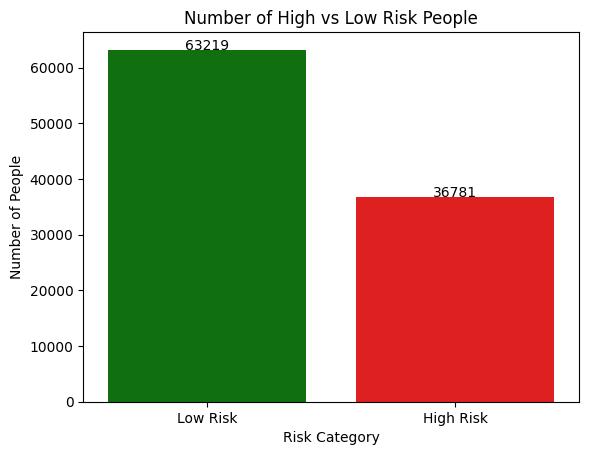

In [138]:
color = {True: 'red', False: 'green'}
sns.countplot(x='is_high_risk', data=data, hue="is_high_risk", palette=color, legend=False)
plt.xticks([0, 1], ['Low Risk', 'High Risk'])
plt.xlabel('Risk Category')
plt.ylabel('Number of People')
plt.title('Number of High vs Low Risk People')

#adds the numbers on top
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width()/2, height + 0.5, int(height), ha='center')

plt.show()

Text(0.5, 1.0, 'Distribution of Risk Scores')

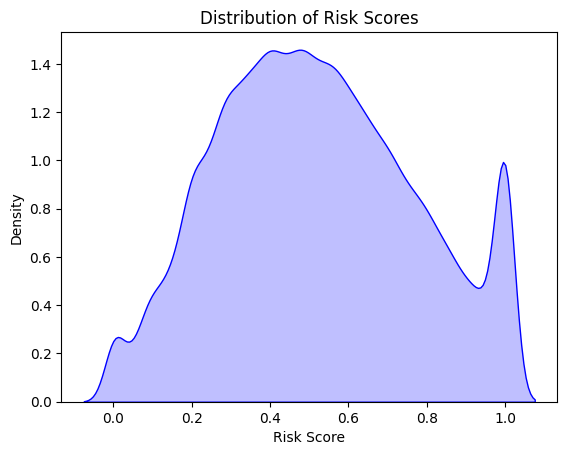

In [200]:
sns.kdeplot(data['risk_score'], fill=True, color='blue')
plt.xlabel('Risk Score')
plt.ylabel('Density')
plt.title('Distribution of Risk Scores')

## Age
Age has the highest correlation with risk score

<Axes: title={'center': 'Age distribution of dataset'}, ylabel='Frequency'>

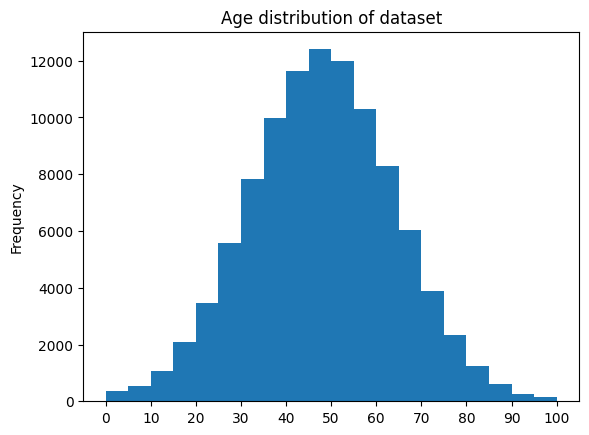

In [198]:
data['age'].plot.hist(bins=20, xticks=range(0, 110, 10), title="Age distribution of dataset")

In [143]:
average_age = data['age'].mean()
average_age

np.float64(47.5215)

In [197]:
# correlations with age
age_correlations = data.corr(numeric_only=True)['age']
irrelevant_age_cols = ['age', 'person_id', 'is_high_risk']
for col in irrelevant_age_cols:
    age_correlations.pop(col)
relevant_age_correlations = age_correlations[age_correlations > 0.1].sort_values(ascending=False)
relevant_age_correlations

,age
risk_score,0.720989
systolic_bp,0.555174
diastolic_bp,0.304183
chronic_count,0.136148
annual_medical_cost,0.131166
annual_premium,0.127473
monthly_premium,0.127473
ldl,0.110565
total_claims_paid,0.101717


Of the attributes we are looking at, blood pressure and number of chronic conditions are the main things that go up as you age that affect risk score

## Smoking

As seen in the graph below, current smokers have a much higher risk score on average than those who are not.
Surprisingly, former smokers have an almost identical risk score on average to those who never smoked

Text(0.5, 1.0, 'Risk Score by Smoking Status')

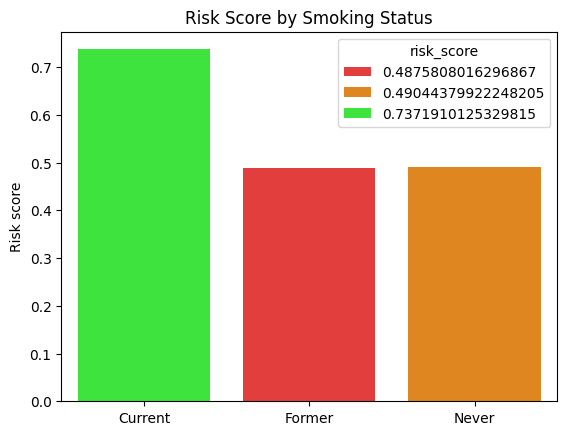

In [363]:
grouped = data.groupby('smoker', observed=True)['risk_score'].mean().reset_index()

sns.barplot(data=grouped, x='smoker', y='risk_score', hue="risk_score", palette=['#ff2222', '#ff8800', '#22ff22'])

plt.ylabel("Risk score")
plt.xlabel(None)
plt.title("Risk Score by Smoking Status")

## Alcohol
Surprisingly, alcohol seems to have an incredibly small effect on the risk score

In [364]:
data['alcohol_freq'].value_counts()

,count
alcohol_freq,
Occasional,45078
None,30083
Weekly,19833
Daily,5006


/tmp/ipython-input-373666084.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('alcohol_freq')['risk_score'].mean().reset_index()


Text(0.5, 1.0, 'Risk Score by Alcohol Consumption Frequency')

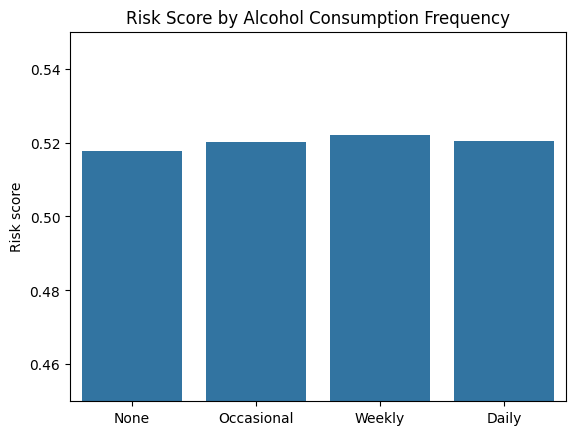

In [147]:
grouped = data.groupby('alcohol_freq')['risk_score'].mean().reset_index()

sns.barplot(data=grouped, x='alcohol_freq', y='risk_score', order=['None', 'Occasional', 'Weekly', 'Daily'])
plt.ylim(0.45 , 0.55)
plt.ylabel("Risk score")
plt.xlabel(None)
plt.title("Risk Score by Alcohol Consumption Frequency")

## Sex

Men and women have basically identical risk scores on average. 'Other' has a very slightly lower mean risk score, likely due to statistical variation from the small population size

/tmp/ipython-input-3289001518.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('sex')['risk_score'].mean().reset_index()
/tmp/ipython-input-3289001518.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='sex', y='risk_score', palette=['#ff8888', '#4488ff', '#66dd66'])


Text(0, 0.5, 'Risk Score')

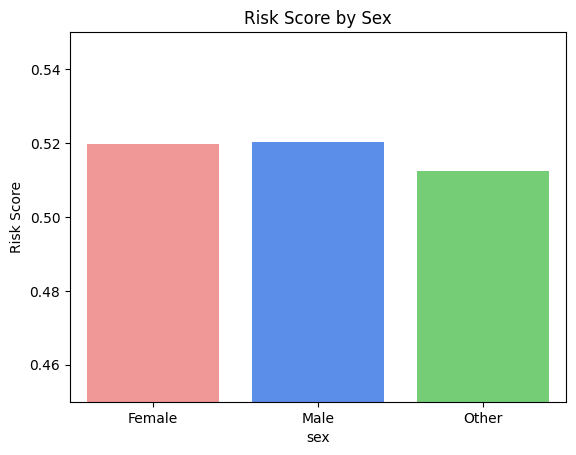

In [148]:
grouped = data.groupby('sex')['risk_score'].mean().reset_index()
sns.barplot(data=grouped, x='sex', y='risk_score', palette=['#ff8888', '#4488ff', '#66dd66'])
plt.ylim(0.45 , 0.55)
plt.title("Risk Score by Sex")
plt.ylabel("Risk Score")

## Correlation Charts

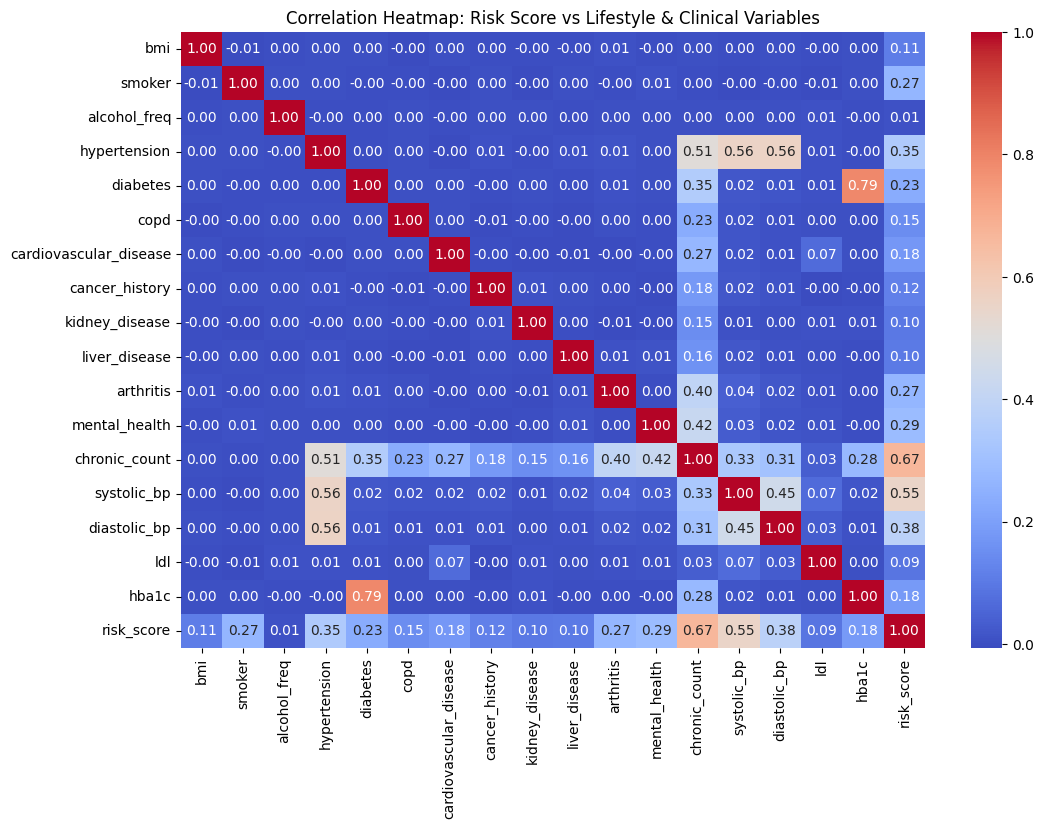

In [151]:
cols = [
    "bmi","smoker","alcohol_freq",
    "hypertension","diabetes","copd","cardiovascular_disease","cancer_history",
    "kidney_disease","liver_disease","arthritis","mental_health","chronic_count",
    "systolic_bp","diastolic_bp","ldl","hba1c","risk_score",
]

df_subset = analysis_data[cols]

# Keep only numeric columns for correlation
numeric_cols = df_subset.select_dtypes(include=["float64","int64"]).columns

corr = df_subset[numeric_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Risk Score vs Lifestyle & Clinical Variables")
plt.show()

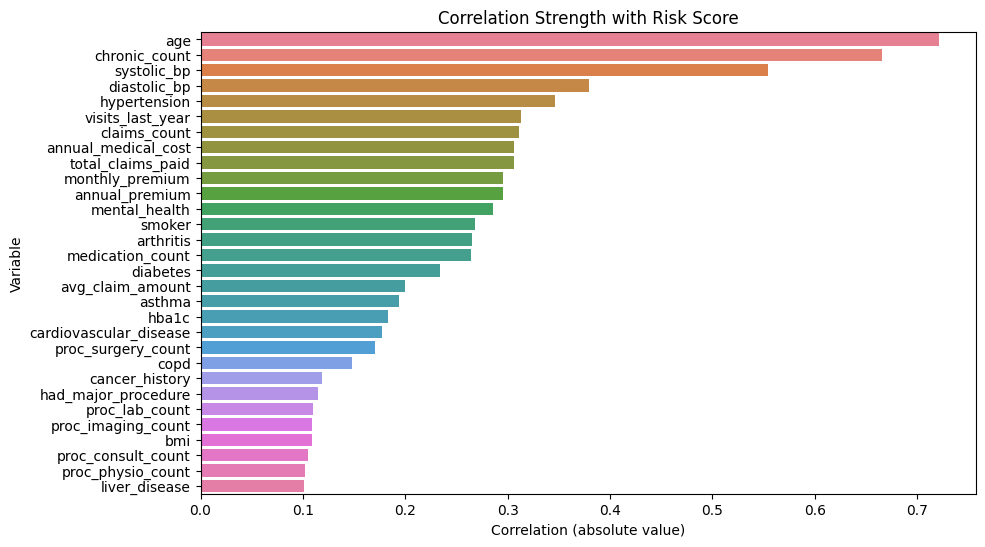

In [331]:
sort_feats = strong_corr.sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=sort_feats.values, y=sort_feats.index, hue=sort_feats.index)
plt.title("Correlation Strength with Risk Score")
plt.xlabel("Correlation (absolute value)")
plt.ylabel("Variable")
plt.show()

# Models(Regression/Catboost)

## Linear Regression

In [354]:
#default Linear Regression model with all encodings
test_data = analysis_data.drop(["risk_score", "is_high_risk"], axis=1)
data_train, data_test, risk_train, risk_test = train_test_split(test_data, analysis_data['risk_score'])
linearModel = LinearRegression()
linearModel.fit(data_train, risk_train)
risk_pred = linearModel.predict(data_test)

In [355]:
linearModel.score(data_test, risk_test)

0.9352754319634126

### Testing the Linear Model's Error.

In [356]:
print("R² on test set:", r2_score(risk_test, risk_pred))

#mean squared error
mse = mean_squared_error(risk_test, risk_pred)
print("MSE on test set:", mse)

#root mean squared error
print("RMSE on test set:", np.sqrt(mse))

#mean absolute error
mae = mean_absolute_error(risk_test, risk_pred)
print("MAE on test set:", mae)

#AIC(negatives are better)
residual = risk_test - risk_pred
sse = np.sum(residual**2)
rows, cols = analysis_data.shape
aic = rows * np.log(sse/rows) + 2*(cols + 1)

print("The AIC is: ", aic)


R² on test set: 0.9352754319634126
MSE on test set: 0.004061749590067162
RMSE on test set: 0.06373185694821046
MAE on test set: 0.04767450982130483
The AIC is:  -689111.5825799487


These results are very good with a R2 value of 0.94, the models coefficients and intercept should give us a good idea of the contribution that each feature has for risk score.

### Inspecting the Model's Coefficients and Intercept

In [348]:
intercept = linearModel.intercept_
print("Intercept:", intercept)
coef_table = pd.Series(linearModel.coef_, index=data_train.columns)
coef_table.name = "Coefficients"
coef_table.sort_values(ascending=False)

Intercept: -0.2847068482395151


,Coefficients
chronic_count,0.161840
monthly_premium,0.122911
smoker,0.098239
hypertension,0.021431
diabetes,0.020499
...,...
urban_rural_Urban,-0.001112
sex_Other,-0.001179
days_hospitalized_last_3yrs,-0.003368
annual_premium,-0.010242


Even though 0.93 is really good, because risk_score is most likely derived, it should be possible to get an r^2 even greater. At first we tried optimizing the model, by trying to remove colinearity, and scaling the data, but this did not effect the model.

While looking for a new model, we eventually discovered an advanced gradient boosting model that we can use.

## Catboost

In [349]:
#This will take a while, so sit tight.



cat_data = data.drop(["risk_score", "is_high_risk"], axis=1)
cb_data_train, cb_data_test, cb_risk_train, cb_risk_test = train_test_split(cat_data, data['risk_score'])

model = CatBoostRegressor(verbose=50)
model.fit(cb_data_train, cb_risk_train, cat_features=obj_cols)
cb_risk_pred = model.predict(cb_data_test)
catboost_score = model.score(cb_data_test, cb_risk_test)
catboost_score

Learning rate set to 0.080991
0:	learn: 0.2318773	total: 155ms	remaining: 2m 34s
50:	learn: 0.0116011	total: 8.65s	remaining: 2m 40s
100:	learn: 0.0057850	total: 15.3s	remaining: 2m 16s
150:	learn: 0.0049597	total: 22.5s	remaining: 2m 6s
200:	learn: 0.0045010	total: 29.2s	remaining: 1m 56s
250:	learn: 0.0040645	total: 36.2s	remaining: 1m 47s
300:	learn: 0.0039022	total: 42.5s	remaining: 1m 38s
350:	learn: 0.0036338	total: 49.7s	remaining: 1m 31s
400:	learn: 0.0034129	total: 57.7s	remaining: 1m 26s
450:	learn: 0.0031828	total: 1m 4s	remaining: 1m 18s
500:	learn: 0.0029521	total: 1m 12s	remaining: 1m 12s
550:	learn: 0.0027667	total: 1m 20s	remaining: 1m 5s
600:	learn: 0.0026288	total: 1m 28s	remaining: 58.5s
650:	learn: 0.0024973	total: 1m 36s	remaining: 51.6s
700:	learn: 0.0023371	total: 1m 43s	remaining: 44.2s
750:	learn: 0.0022347	total: 1m 51s	remaining: 37.1s
800:	learn: 0.0021058	total: 2m	remaining: 29.9s
850:	learn: 0.0020042	total: 2m 7s	remaining: 22.3s
900:	learn: 0.0019390	to

np.float64(0.9999378187406173)

### Testing the Catboost Models Error

In [358]:
print("R² on test set:", r2_score(cb_risk_test, cb_risk_pred))

#mean squared error
mse = mean_squared_error(cb_risk_test, cb_risk_pred)
print("MSE on test set:", mse)

#root mean squared error
print("RMSE on test set:", np.sqrt(mse))

#mean absolute error
mae = mean_absolute_error(cb_risk_test, cb_risk_pred)
print("MAE on test set:", mae)

#AIC(negatives are better)
residual = cb_risk_test - cb_risk_pred
sse = np.sum(residual**2)
rows, cols = data.shape
aic = rows * np.log(sse/rows) + 2*(cols + 1)

print("The AIC is: ", aic)

R² on test set: 0.9999378187406173
MSE on test set: 3.914187204602193e-06
RMSE on test set: 0.0019784304902124294
MAE on test set: 0.0009311776708424398
The AIC is:  -1383609.722176961


An R2 Value of 0.99 is extremely good and is exactly what we were looking for. The reason this model is so much better than linear regression is because this model uses gradient boosting. This allows the model to calculate how features affect the risk score exponentially, logarithmically etc. While linear reegresssion can only look at linear relations.

Catboost also uses advanced encoding to make our categories better represented.

In [362]:
feature_importances = model.get_feature_importance()
feature_names = cb_data_train.columns


importance_data = pd.DataFrame({"Feature": feature_names,"Importance": feature_importances})
importance_data = importance_data.sort_values(by="Importance", ascending=False).reset_index(drop=True)


for _, row in importance_data.head(10).iterrows():
  print(f"{row['Feature']}: {row['Importance']:.5f}")

chronic_count: 39.08478
age: 37.32307
smoker: 19.64899
bmi: 3.93942
alcohol_freq: 0.00053
sex: 0.00034
plan_type: 0.00026
visits_last_year: 0.00019
proc_surgery_count: 0.00019
systolic_bp: 0.00018


### Score with only 4 columns with the highest feature importance

In [292]:
minimal_data = data[["total_claims_paid","age","smoker","bmi"]]

data_train, data_test, risk_train, risk_test = train_test_split(minimal_data, data['risk_score'], random_state=42)
model = CatBoostRegressor()
model.fit(data_train, risk_train, cat_features=["smoker"])

print(model.score(data_test, risk_test))

Learning rate set to 0.080991
0:	learn: 0.2374576	total: 29.7ms	remaining: 29.7s
1:	learn: 0.2257502	total: 55.2ms	remaining: 27.6s
2:	learn: 0.2154971	total: 81.3ms	remaining: 27s
3:	learn: 0.2061460	total: 110ms	remaining: 27.5s
4:	learn: 0.1976524	total: 135ms	remaining: 27s
5:	learn: 0.1901488	total: 161ms	remaining: 26.7s
6:	learn: 0.1834702	total: 191ms	remaining: 27s
7:	learn: 0.1775913	total: 218ms	remaining: 27s
8:	learn: 0.1722173	total: 243ms	remaining: 26.7s
9:	learn: 0.1675626	total: 265ms	remaining: 26.2s
10:	learn: 0.1633834	total: 288ms	remaining: 25.9s
11:	learn: 0.1597999	total: 310ms	remaining: 25.5s
12:	learn: 0.1567149	total: 331ms	remaining: 25.1s
13:	learn: 0.1538988	total: 358ms	remaining: 25.2s
14:	learn: 0.1513760	total: 384ms	remaining: 25.2s
15:	learn: 0.1491975	total: 410ms	remaining: 25.2s
16:	learn: 0.1473094	total: 436ms	remaining: 25.2s
17:	learn: 0.1456160	total: 462ms	remaining: 25.2s
18:	learn: 0.1441124	total: 488ms	remaining: 25.2s
19:	learn: 0.142

KeyboardInterrupt: 

This Catboost model is significantly worse even though we provided the most influential features. The reason is that Catboost thrives off multiple features using feature interactions. If you remove most of the trees, then Catboost has less data to sharpen the model. Even if that column isn't useful.

## Models Graphed

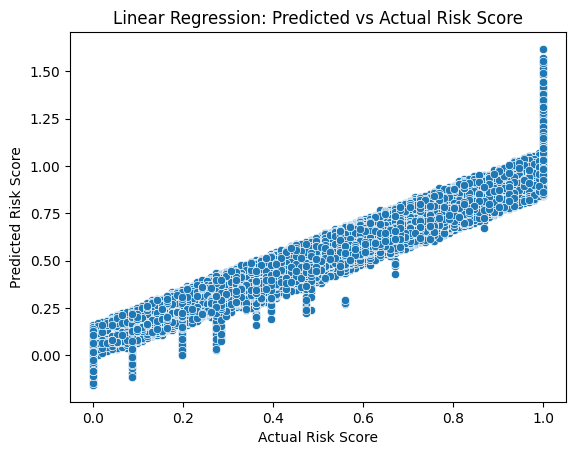

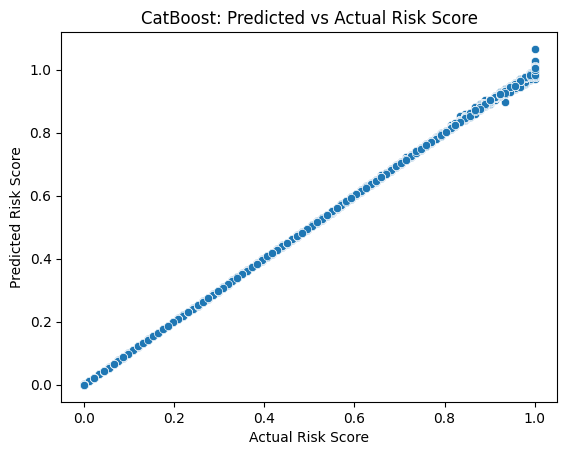

In [360]:
# Plot predicted vs actual
sns.scatterplot(x=risk_test, y=risk_pred)
plt.xlabel("Actual Risk Score")
plt.ylabel("Predicted Risk Score")
plt.title("Linear Regression: Predicted vs Actual Risk Score")
plt.show()

sns.scatterplot(x=cb_risk_test, y=cb_risk_pred)
plt.xlabel("Actual Risk Score")
plt.ylabel("Predicted Risk Score")
plt.title("CatBoost: Predicted vs Actual Risk Score")
plt.show()

